택시를 이용하여 승객을 운송하는 산업활동을 말한다. 운전자 딸린 승용차 임대도 포함한다.  

<예시>  
·택시 운송  
·승용차 임대(운전자 딸린)  
·개인택시 운송  
·리무진 운송  

In [1]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [2]:
data = pd.read_csv("업종별/택시 운송업.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381993 entries, 0 to 381992
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      381993 non-null  object
 1   CARD_SIDO_NM  381993 non-null  object
 2   CARD_CCG_NM   381993 non-null  object
 3   STD_CLSS_NM   381993 non-null  object
 4   HOM_SIDO_NM   381993 non-null  object
 5   HOM_CCG_NM    380659 non-null  object
 6   AGE           381993 non-null  object
 7   SEX_CTGO_CD   381993 non-null  int64 
 8   FLC           381993 non-null  int64 
 9   CSTMR_CNT     381993 non-null  int64 
 10  AMT           381993 non-null  int64 
 11  CNT           381993 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 37.9+ MB
None


In [4]:
#안쓰는 컬럼 드랍, 정제
df=data.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'STD_CLSS_NM'], axis=1)
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [5]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381993 entries, 0 to 381992
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      381993 non-null  object
 1   CARD_SIDO_NM  381993 non-null  object
 2   HOM_SIDO_NM   381993 non-null  object
 3   AGE           381993 non-null  object
 4   SEX_CTGO_CD   381993 non-null  int64 
 5   FLC           381993 non-null  int64 
 6   CSTMR_CNT     381993 non-null  int64 
 7   AMT           381993 non-null  int64 
 8   CNT           381993 non-null  int64 
 9   year          381993 non-null  int64 
 10  month         381993 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 35.0+ MB
None
  REG_YYMM CARD_SIDO_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT     AMT  \
0   201901           강원          강원  20s            2    1          7  143360   
1   201901           강원          강원  40s            1    3          3   38090   
2   201901           강원        

In [6]:
print(df.CARD_SIDO_NM.unique()) #14
print(df.HOM_SIDO_NM.unique()) 

['강원' '경기' '경남' '경북' '대구' '부산' '서울' '인천' '전북' '충남' '충북' '광주' '전남' '울산'
 '제주']
['강원' '경기' '서울' '충남' '인천' '충북' '경북' '광주' '대구' '대전' '부산' '전북' '제주' '경남'
 '세종' '울산' '전남']


CARD_SIDO_NM
전남            30350
울산           196300
충남          1195880
광주          1244100
제주          1449300
강원          2642910
전북          5256000
충북          6614110
경북          9435880
경남        298087108
인천       2035931863
경기       2503937856
부산      62274858483
대구      91184266476
서울    1575084395358
Name: AMT, dtype: int64


Text(0.5, 1.0, '지역별 AMT')

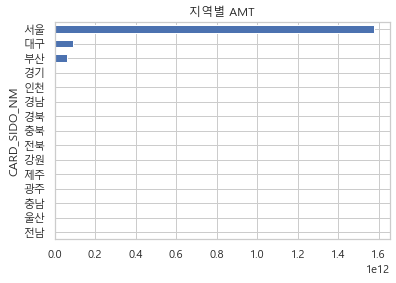

In [7]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
print(df1)
df1.plot(kind="barh")
plt.title("지역별 AMT")

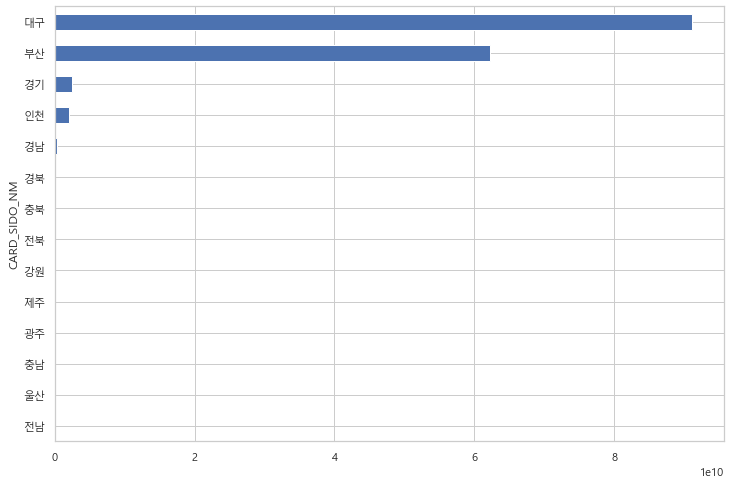

In [9]:
#서울 제외한 그래프
df1_1= df1[:14]
df1_1.plot(kind="barh", figsize=(12,8))

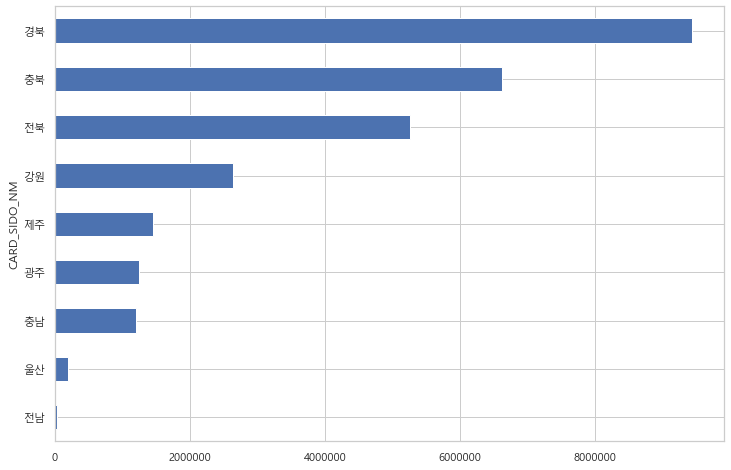

In [12]:
#서울,대구,부산,경기,인천,경남 제외한 그래프
df1_2= df1[:9]
df1_2.plot(kind="barh", figsize=(12,8))

REG_YYMM
201901    107747926483
201902    100387649746
201903    112410966348
201904    119090676693
201905    123211255186
201906    115315039720
201907    130881819332
201908    123702244107
201909    125292165688
201910    123948343849
201911    119271642875
201912    132363513946
202001    118323410680
202002     97328135193
202003     84134752128
Name: AMT, dtype: int64


Text(0.5, 1.0, '기간별 AMT')

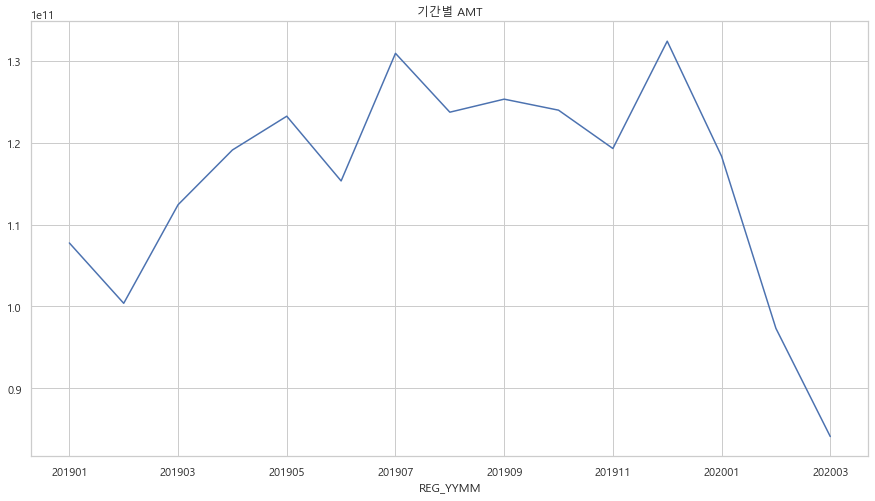

In [13]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
print(df2)
df2.plot(figsize=(15,8))
plt.title("기간별 AMT")

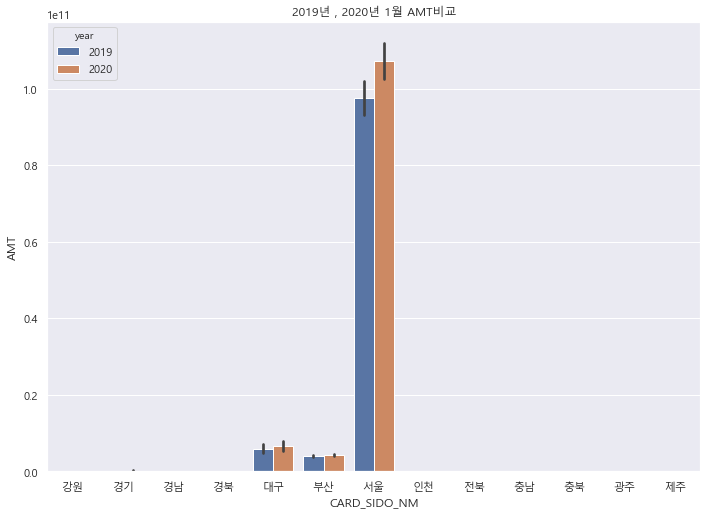

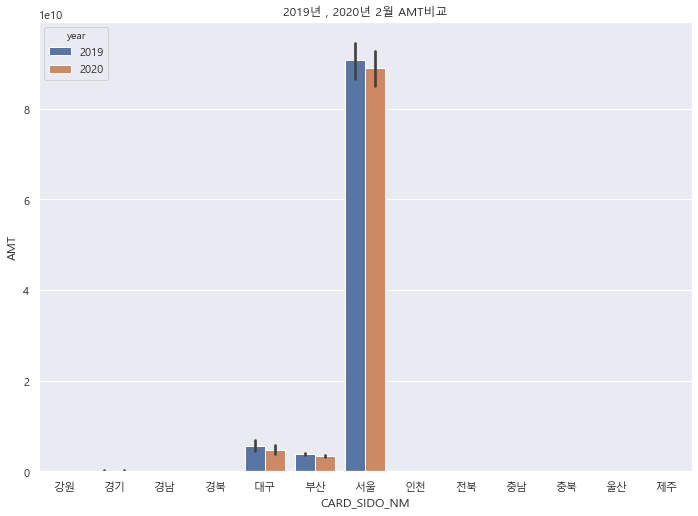

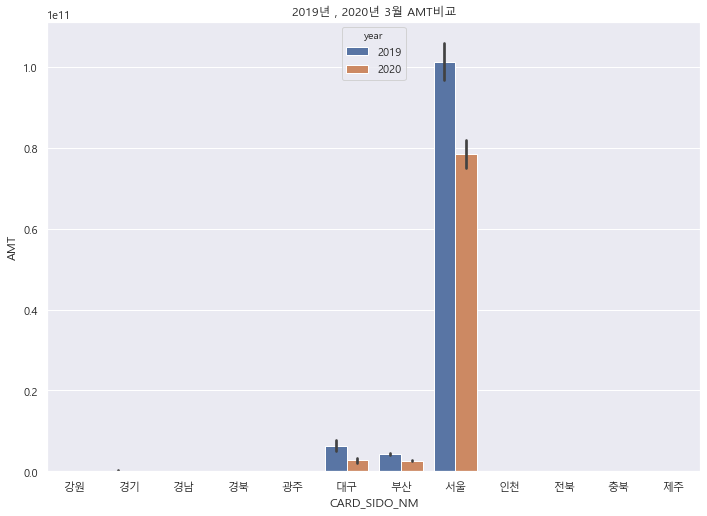

In [14]:
for i in range(1, 4):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

In [15]:
df_noS = df[df['CARD_SIDO_NM']!='서울']

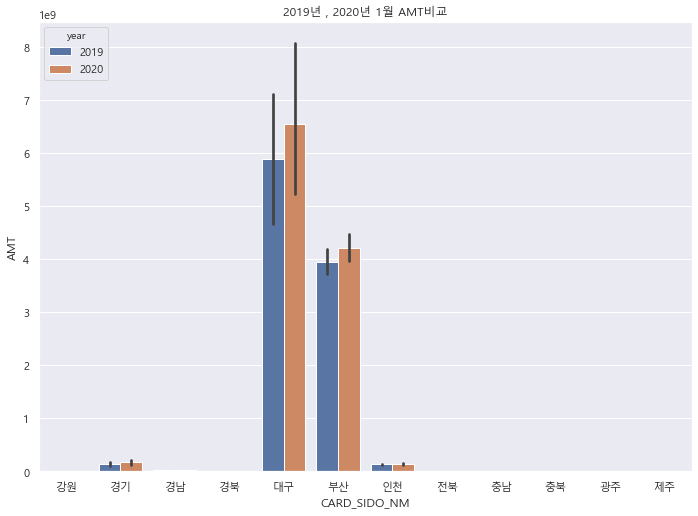

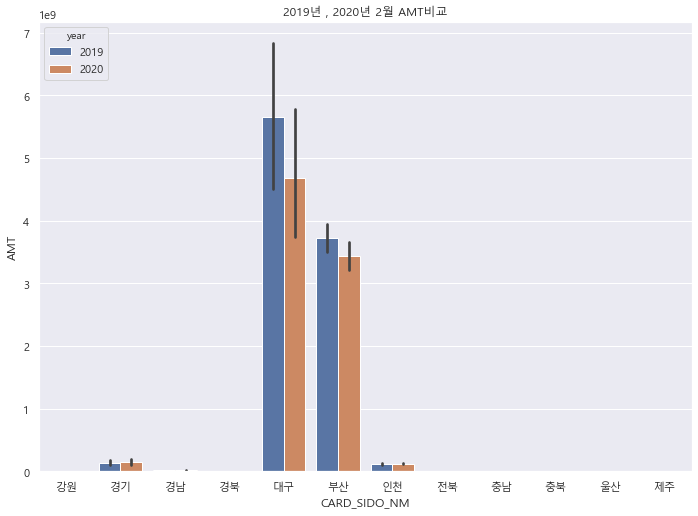

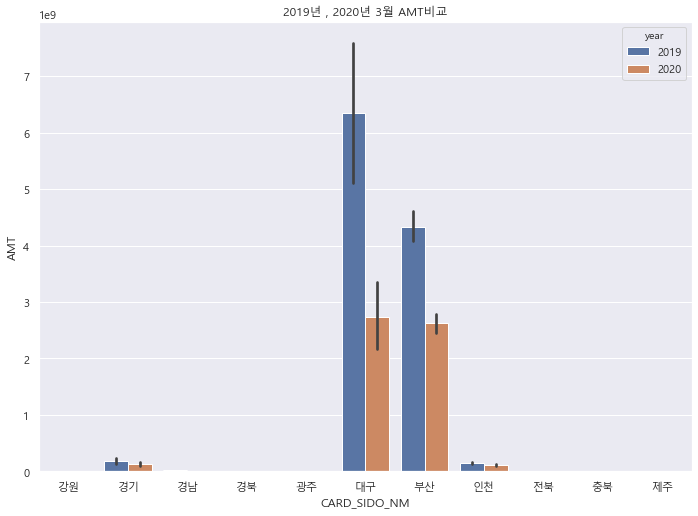

In [16]:
#서울 제외...
for i in range(1, 4):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    df_month = df_noS[df_noS.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

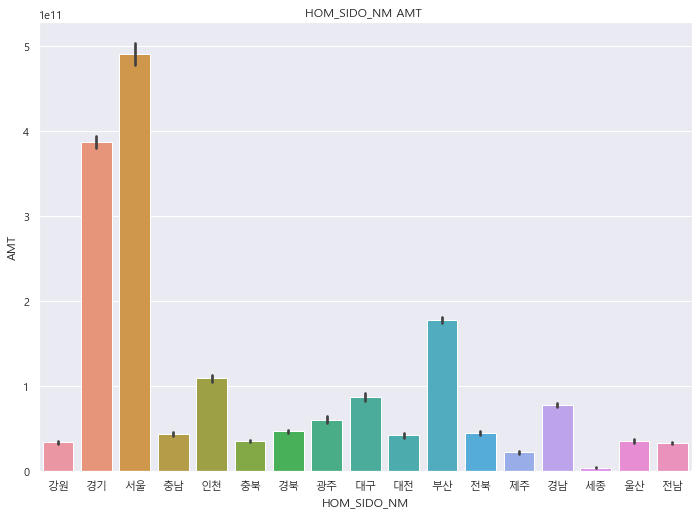

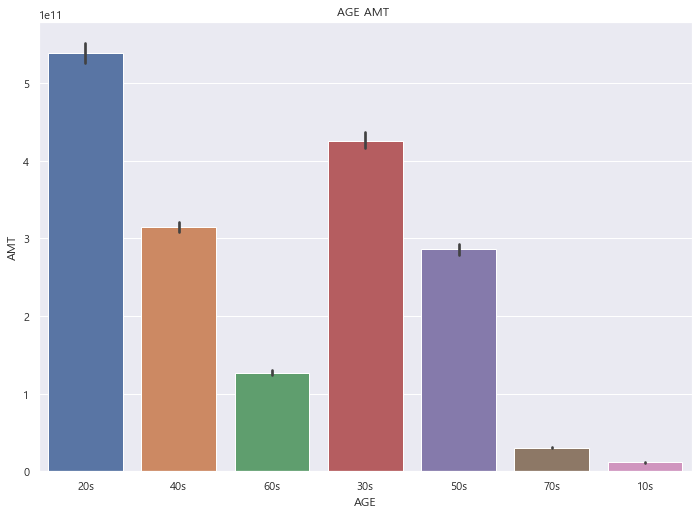

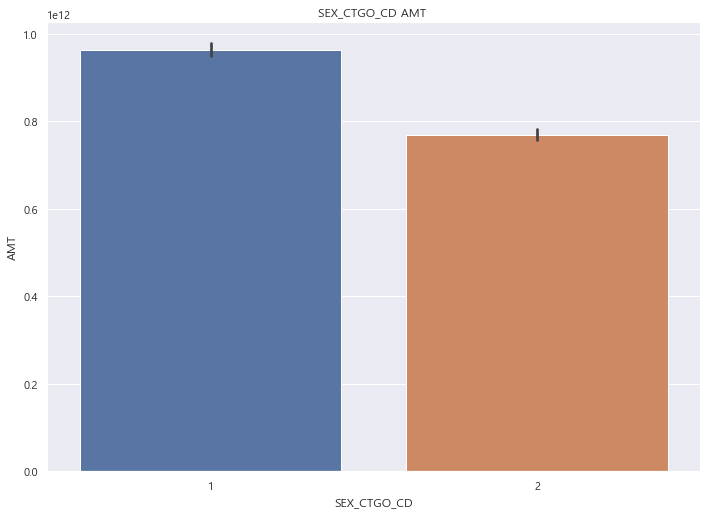

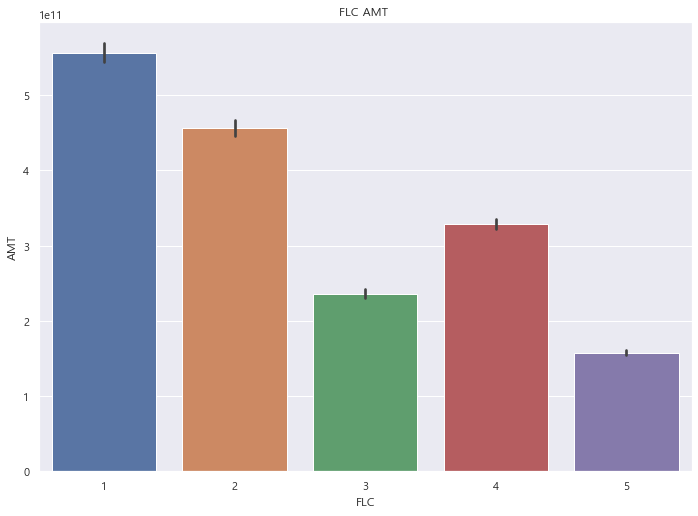

In [17]:
cols = ['HOM_SIDO_NM','AGE','SEX_CTGO_CD', 'FLC']
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df, y = 'AMT', x = val, orient = 'v',estimator = sum)
    plt.title(val +' AMT ')
    plt.show()